# **Classification (Klasifikacija)**

https://scikit-learn.org/stable/supervised_learning.html#supervised-learning

---

## 1. Problem

Dodjeljivanje klase novim podacima na temelju već označenih podataka.
Razlika u odnosu na grupiranje:
- Grupiranje nema označene podatke (ne znamo klasu).
- Klasifikacija ima unaprijed označene podatke (znamo klasu).

## 2. Primjer primjene: Procjena stanja prometne mreže

- Podatci za treniranje algoritma: Brzina, gustoća i stanje prometne mreže mjereno na promatranoj autocesti.
- Podaci za klasifikaciju (novi podaci): Brzina i gustoća za koje treba odrediti klasu.
- Pitanje koje želimo odgovoriti: ```"Kojim grupama pripadaju novi podatci?"```

## 3. Učitavanje potrebnih Python paketa

In [12]:
# Packages imports
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

## 3. Učitavanje podataka
### a) Spajanje sa Google Drive-om

In [2]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


### b) Učitavanje podataka

In [3]:
# Path to folder at google drive. 
path = 'drive/MyDrive/RADIONICA_FPZ_Datalab/Podatci/'

# Read data from path to pandas dataframe.
data = pd.read_csv(f"{path}classification.csv", index_col=0)

data

,speed,density,class
0,41.744769,67.229948,2
1,53.837614,71.987984,0
2,55.346193,72.653424,0
3,42.658655,66.338272,2
4,55.776065,75.498094,0
...,...,...,...
195,63.656245,51.248524,1
196,40.313447,69.568064,2
197,63.006874,55.439973,1
198,55.820553,68.956649,0


## 4. Vizualizacija ulaznih podataka

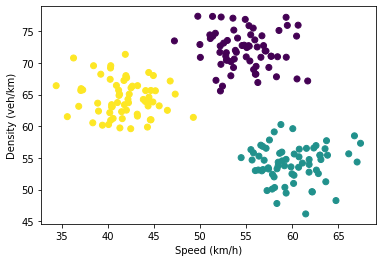

In [4]:
# Plot dataset.
plt.scatter(data["speed"], data["density"], c=data["class"])
plt.xlabel("Speed (km/h)")
plt.ylabel("Density (veh/km)")
plt.show()

## 5. Algoritam klasifikacije

- Za klasifikaciju ćemo koristiti Support Vector Machines (SVM) algoritam. Detalje o algoritmu pronađite ovdje: https://scikit-learn.org/stable/modules/svm.html#classification 

### 5.1. Podjela podataka na podatke za trening i test
- ```X_train``` brzina i gustoća s poznatim klasama.
- ```y_train``` klase za ```X_train```.
- ```X_test``` brzina i gustoća za koje "ne znamo" klase.
- ```y_test``` klase za ```X_test```

In [8]:
# SVM training.
x = data[["speed", "density"]]
y = data["class"]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


LinearSVC(random_state=0, tol=1e-05)

## 5.2. Treniranje algoritma

- Za treniranje algoritma koristimo pripremljene podatke iz varijable ```data``` koja sadrži podatke o brzini, gustoći i klasi prometnog stanja.
- Koristit ćemo linearni SVM jer su podaci dvodimenzionalni i klase su dovoljno odijeljene jedna od druge.

In [ ]:
classificator = LinearSVC(random_state=0, tol=1e-5)
classificator.fit(X_train, y_train)

# Predict classes for test dataset.
y_pred = classificator.predict(X_test)

### 5.3. Rezultati klasifikacije

- Točnost klasifikacije se mjeri usporedbom stvarnih klasa (one koje trebaju biti) u varijabli ```y_test``` i oni koje smo mi predvidjeli korištenjem SVM-a spremljenih u varijablu ```y_pred```.

#### a) Izvještaj o klasifikaciji

- funkcija ```classification_report``` će prikazati rezultat klasifikacije.
- Prvi stupac bez ime na prikazuje imena klasa: 0,1,2
- Slijede stupci ```precision```, ```recall``` i ```f1-score``` koji prikazuju točnost klasifikacije. https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_fscore_support.html#sklearn.metrics.precision_recall_fscore_support
- Stupac ```support``` prikazuje kojiko podataka je korišteno za provjeru.
- Redak ```accuracy``` prikazuje prosječnu točnost klasifikacije.

In [11]:
# Print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.88      0.94        17
           1       1.00      1.00      1.00        20
           2       0.92      1.00      0.96        23

    accuracy                           0.97        60
   macro avg       0.97      0.96      0.97        60
weighted avg       0.97      0.97      0.97        60



#### b) Konfuzijska matrica

- Redovi i stupci prikazuju klase (0,1,2).
- Brojevi unutar matrice prikazuju koliko puta je klasa ispravno predviđena.

In [15]:
# Print confusion matrix
print(confusion_matrix(y_test, y_pred))

[[15  0  2]
 [ 0 20  0]
 [ 0  0 23]]
